## Ejercicio 3 Dataset Arboles de Decisión – Red Wine Quality

In [2]:
# Importar librerías necesarias
import pandas as pd  # Manipulación de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Visualización
import seaborn as sns  # Gráficos estadísticos
from sklearn.model_selection import train_test_split  # Dividir datos
from sklearn.tree import DecisionTreeClassifier  # Modelo de árbol de decisión
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas
from sklearn.preprocessing import StandardScaler  # Escalar variables
from sklearn.feature_selection import SelectKBest, f_classif  # Selección de características
from sklearn.tree import plot_tree  # Visualizar árbol
import warnings
warnings.filterwarnings('ignore')


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

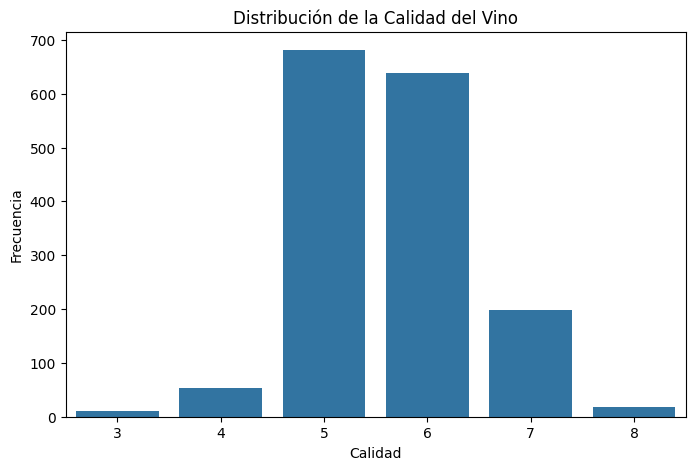

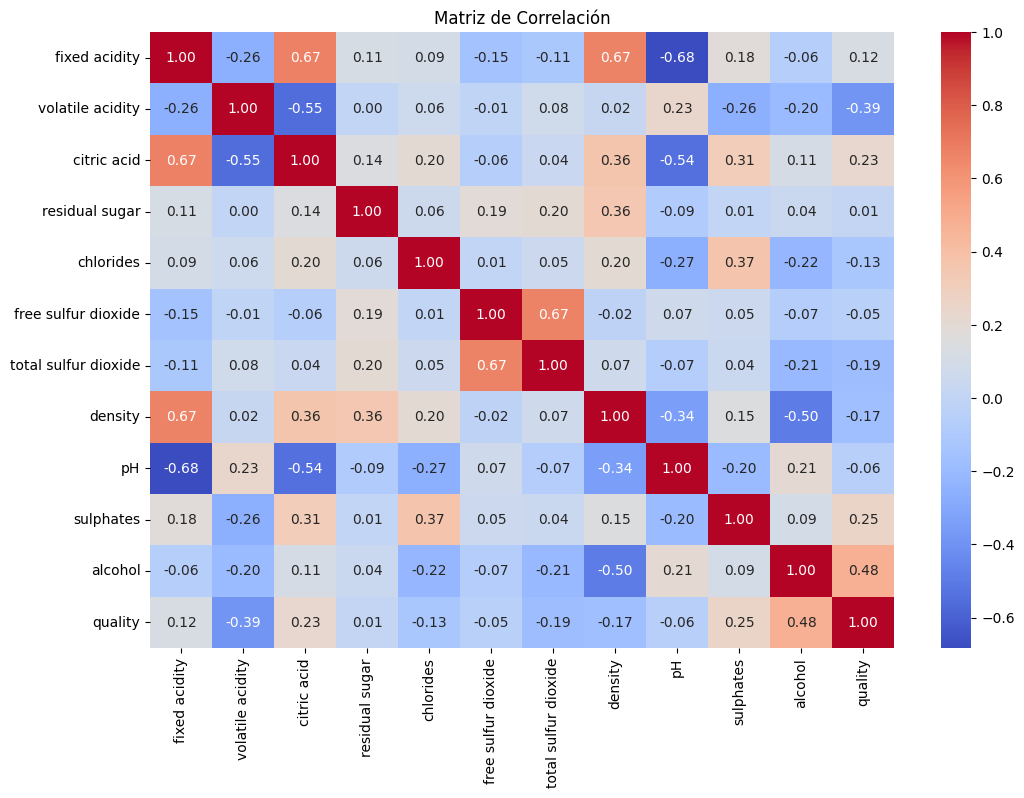

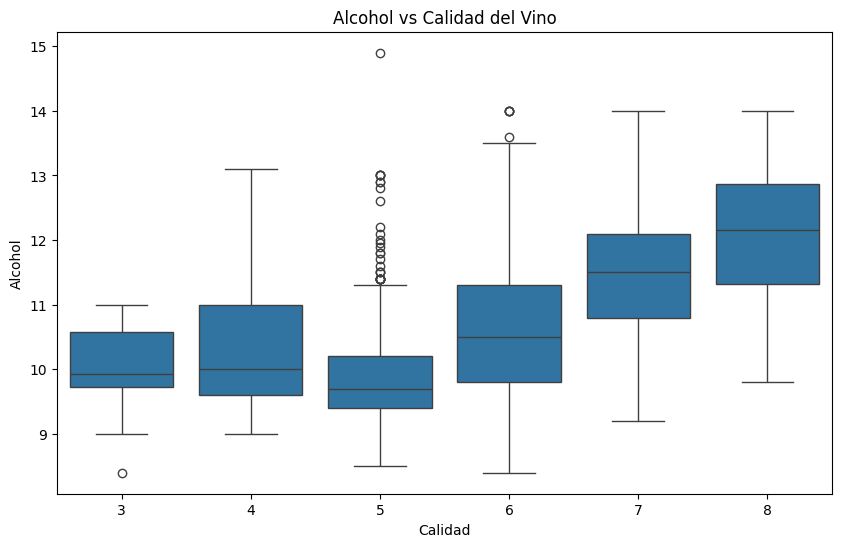

In [7]:

# --------------------------------------
# 1. Análisis Exploratorio de Datos (EDA)
# --------------------------------------
# Cargar el dataset
Wine = pd.read_csv('C:/Users/Family/Videos/winequality-red.csv')

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(Wine.head())

# Información general
print("\nInformación del dataset:")
print(Wine.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(Wine.describe())

# Visualizar distribución de la variable objetivo (calidad)
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=Wine)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(Wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Boxplot de alcohol vs calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=Wine)
plt.title('Alcohol vs Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.show()

In [8]:
# --------------------------------------
# 2. Preprocesamiento de Datos
# --------------------------------------
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(Wine.isnull().sum())

# Separar características y variable objetivo
X = Wine.drop('quality', axis=1)
y = Wine['quality']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
# --------------------------------------
# 3. Selección de Características
# --------------------------------------
# Seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X_scaled, y)

# Obtener nombres de características seleccionadas
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
print("\nCaracterísticas seleccionadas:", selected_features)

# Actualizar X_scaled
X_scaled = X_selected



Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [10]:
# --------------------------------------
# 4. Dividir el Dataset
# --------------------------------------
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (1279, 6)
Tamaño del conjunto de prueba: (320, 6)


In [11]:
# --------------------------------------
# 5. Entrenar el Modelo
# --------------------------------------
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [12]:
# --------------------------------------
# 6. Evaluar el Modelo
# --------------------------------------
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión: {accuracy:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Precisión: 0.55

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.75      0.67       130
           6       0.52      0.52      0.52       132
           7       0.43      0.29      0.34        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.26      0.26      0.25       320
weighted avg       0.52      0.55      0.53       320



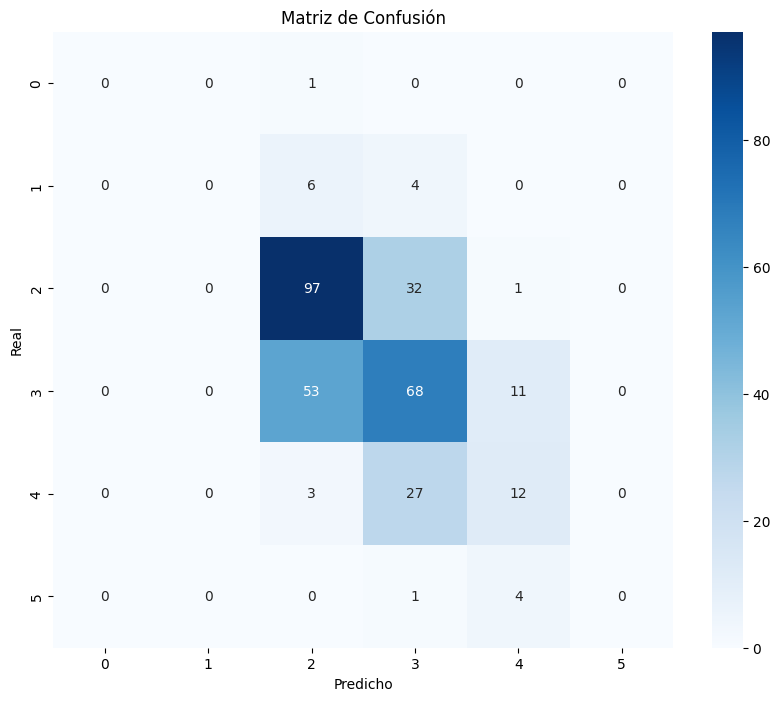

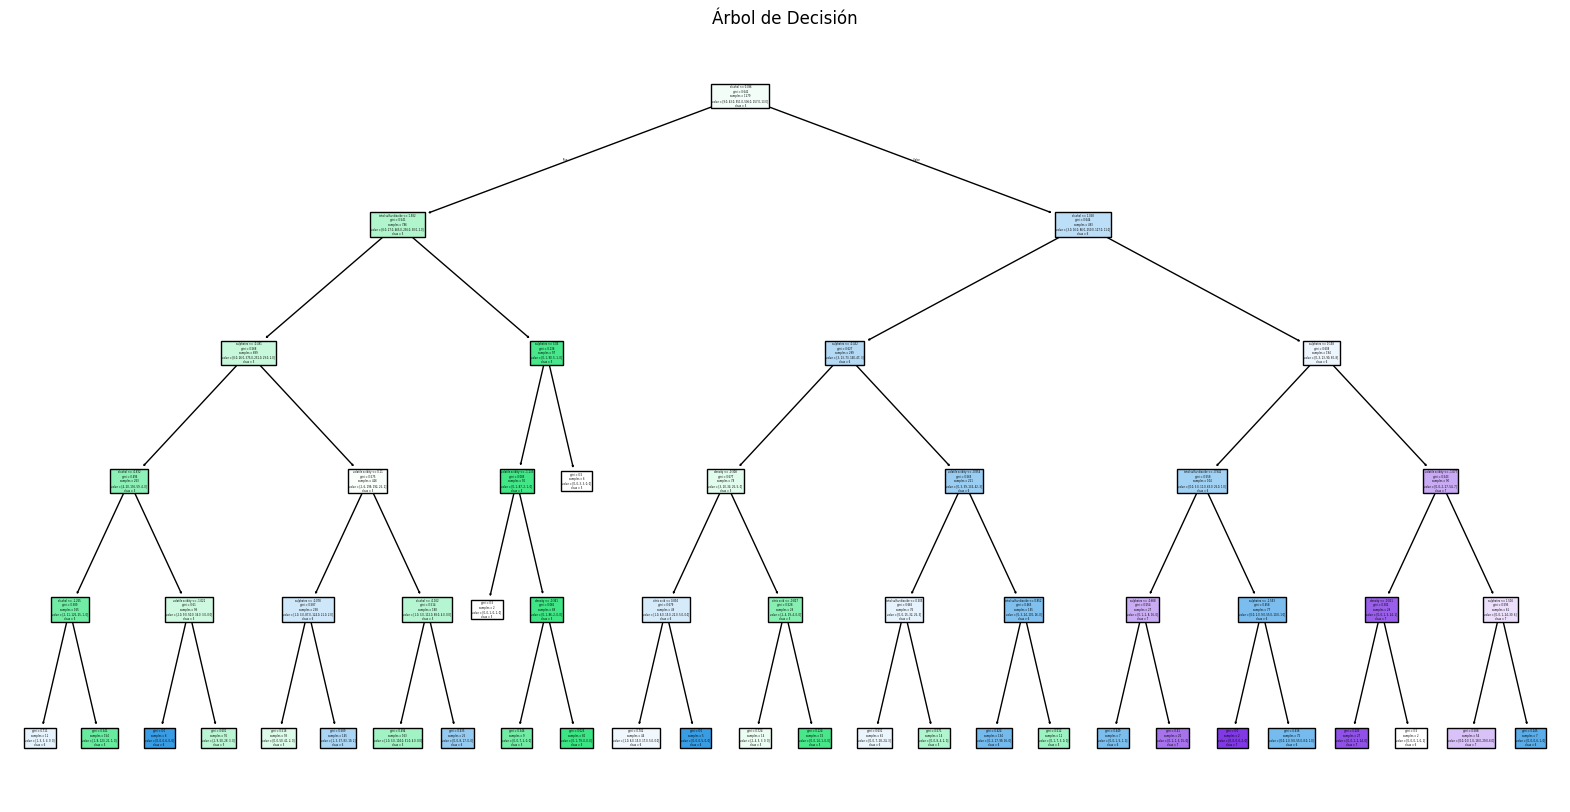

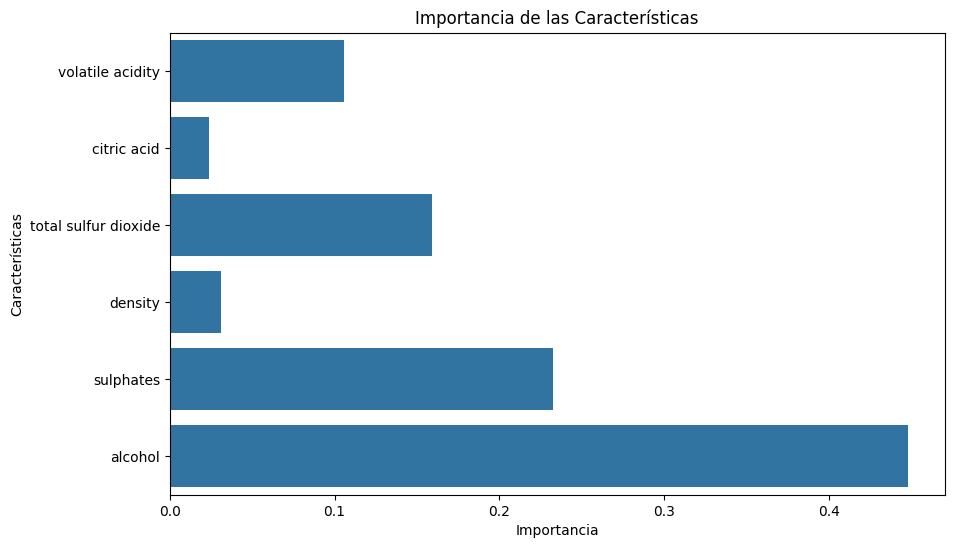

In [13]:
# --------------------------------------
# 7. Visualizaciones de Resultados
# --------------------------------------
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=selected_features, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title('Árbol de Decisión')
plt.show()

# Importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=selected_features)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


In [14]:
# --------------------------------------
# 8. Interpretación y Documentación
# --------------------------------------
print("\nInterpretación de Resultados:")
print(f"- Precisión global del {accuracy*100:.2f}%.")
print("- El reporte de clasificación muestra el rendimiento por clase.")
print("- Características clave:", selected_features)
print("- La matriz de confusión indica errores en clases minoritarias.")
print("- Posibles mejoras: ajustar hiperparámetros con GridSearchCV, usar Random Forest.")


Interpretación de Resultados:
- Precisión global del 55.31%.
- El reporte de clasificación muestra el rendimiento por clase.
- Características clave: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
- La matriz de confusión indica errores en clases minoritarias.
- Posibles mejoras: ajustar hiperparámetros con GridSearchCV, usar Random Forest.
